<a href="https://colab.research.google.com/github/varnikaaavyas/Time-Series-Analysis/blob/main/Denoise_the_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Varnika**\
**Enrollnment No. : E22MCAG0015**


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

In [ ]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


**Answer 1**

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
fig=px.line(df,x='date',y='humidity')
fig.show()

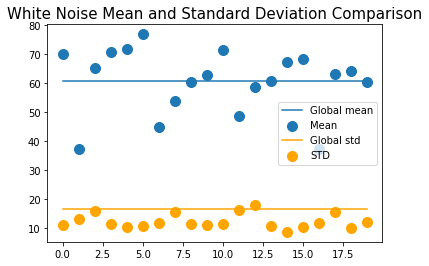

In [ ]:
white_noise_chunks = np.split(df.humidity[:1460],20)
means, stds = [], []

for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

plt.title('White Noise Mean and Standard Deviation Comparison', size=15)
plt.plot(np.arange(len(means)), [df.humidity.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [df.humidity.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend()

In [ ]:
import statsmodels.graphics.tsaplots as tsp

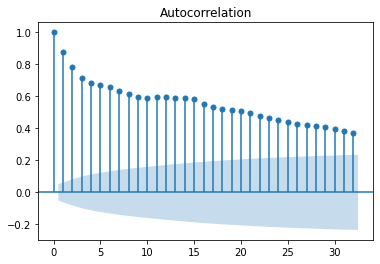

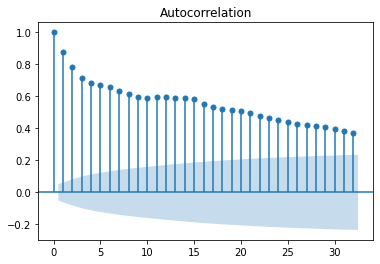

In [ ]:
tsp.plot_acf(np.array(df.humidity))

**ANSWER 2.|**

In [ ]:
import scipy.io.wavfile
import scipy.signal
import pandas as pd
import plotly.express as px

In [ ]:
b,a = scipy.signal.butter(3,0.3,'lowpass')
filteredLowPass = scipy.signal.filtfilt(b,a,df.humidity)

b,a = scipy.signal.butter(3,0.05,'highpass')
filteredHighPass = scipy.signal.filtfilt(b,a,df.humidity)

b,a = scipy.signal.butter(3,[.01, .05],'band')
filteredBandPass = scipy.signal.filtfilt(b,a,df.humidity)


In [ ]:
fig = px.line(df, df.date, df.humidity, title = 'ECG Signal with Noise')
fig.show()

In [ ]:
fig = px.line(filteredLowPass, df.date, filteredLowPass, title = 'lowpass')
fig.show()

fig = px.line(filteredHighPass, df.date, filteredHighPass, title = 'highpass')
fig.show()

fig = px.line(filteredHighPass, df.date, filteredBandPass, title = 'band')
fig.show()

**ANSWER 3.**

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

**Part a.**

In [ ]:
df['Mean'] = df.humidity.mean()
px.line(df, x = df.date, y = df.Mean, title = "Simple Smoothing")


**Part b.**

In [ ]:
df['rolling_mean_humidity'] = df.humidity.rolling(window=12).mean()
px.line(df, x = df.date, y = df.rolling_mean_humidity, title = "Moving Average Smoothing")



**Part c.**

In [ ]:
weights = ([0.8, 0.5, 0.1])

df['Exponential_Smoothing'] = df.humidity.rolling(3).apply(lambda x: np.sum(x*weights))

px.line(df, x = df.date, y = df.Exponential_Smoothing, title = "Exponential Smoothing")